In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [56]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("henriqueyamahata/bank-marketing")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/henriqueyamahata/bank-marketing/versions/1


In [57]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv(f'{path}/bank-additional-full.csv', sep=';')

# Display the first 10 rows of the DataFrame
df.head(10)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [58]:
df.drop('duration', axis=1, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [60]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [61]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [62]:
df.shape

(41188, 20)

In [63]:
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  campaign  pdays

In [64]:
for i in df:
    print(f'column {i}: {df[i].unique()}')

column age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
column job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
column marital: ['married' 'single' 'divorced' 'unknown']
column education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
column default: ['no' 'unknown' 'yes']
column housing: ['no' 'yes' 'unknown']
column loan: ['no' 'yes' 'unknown']
column contact: ['telephone' 'cellular']
column month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
column day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
column campaign: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 2

In [65]:
#first transform y into numerical value
df['y']=df['y'].replace({'yes':1,'no':0})
df['y'].unique()
df.describe()

<ipython-input-65-5e8173c90037>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y']=df['y'].replace({'yes':1,'no':0})


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


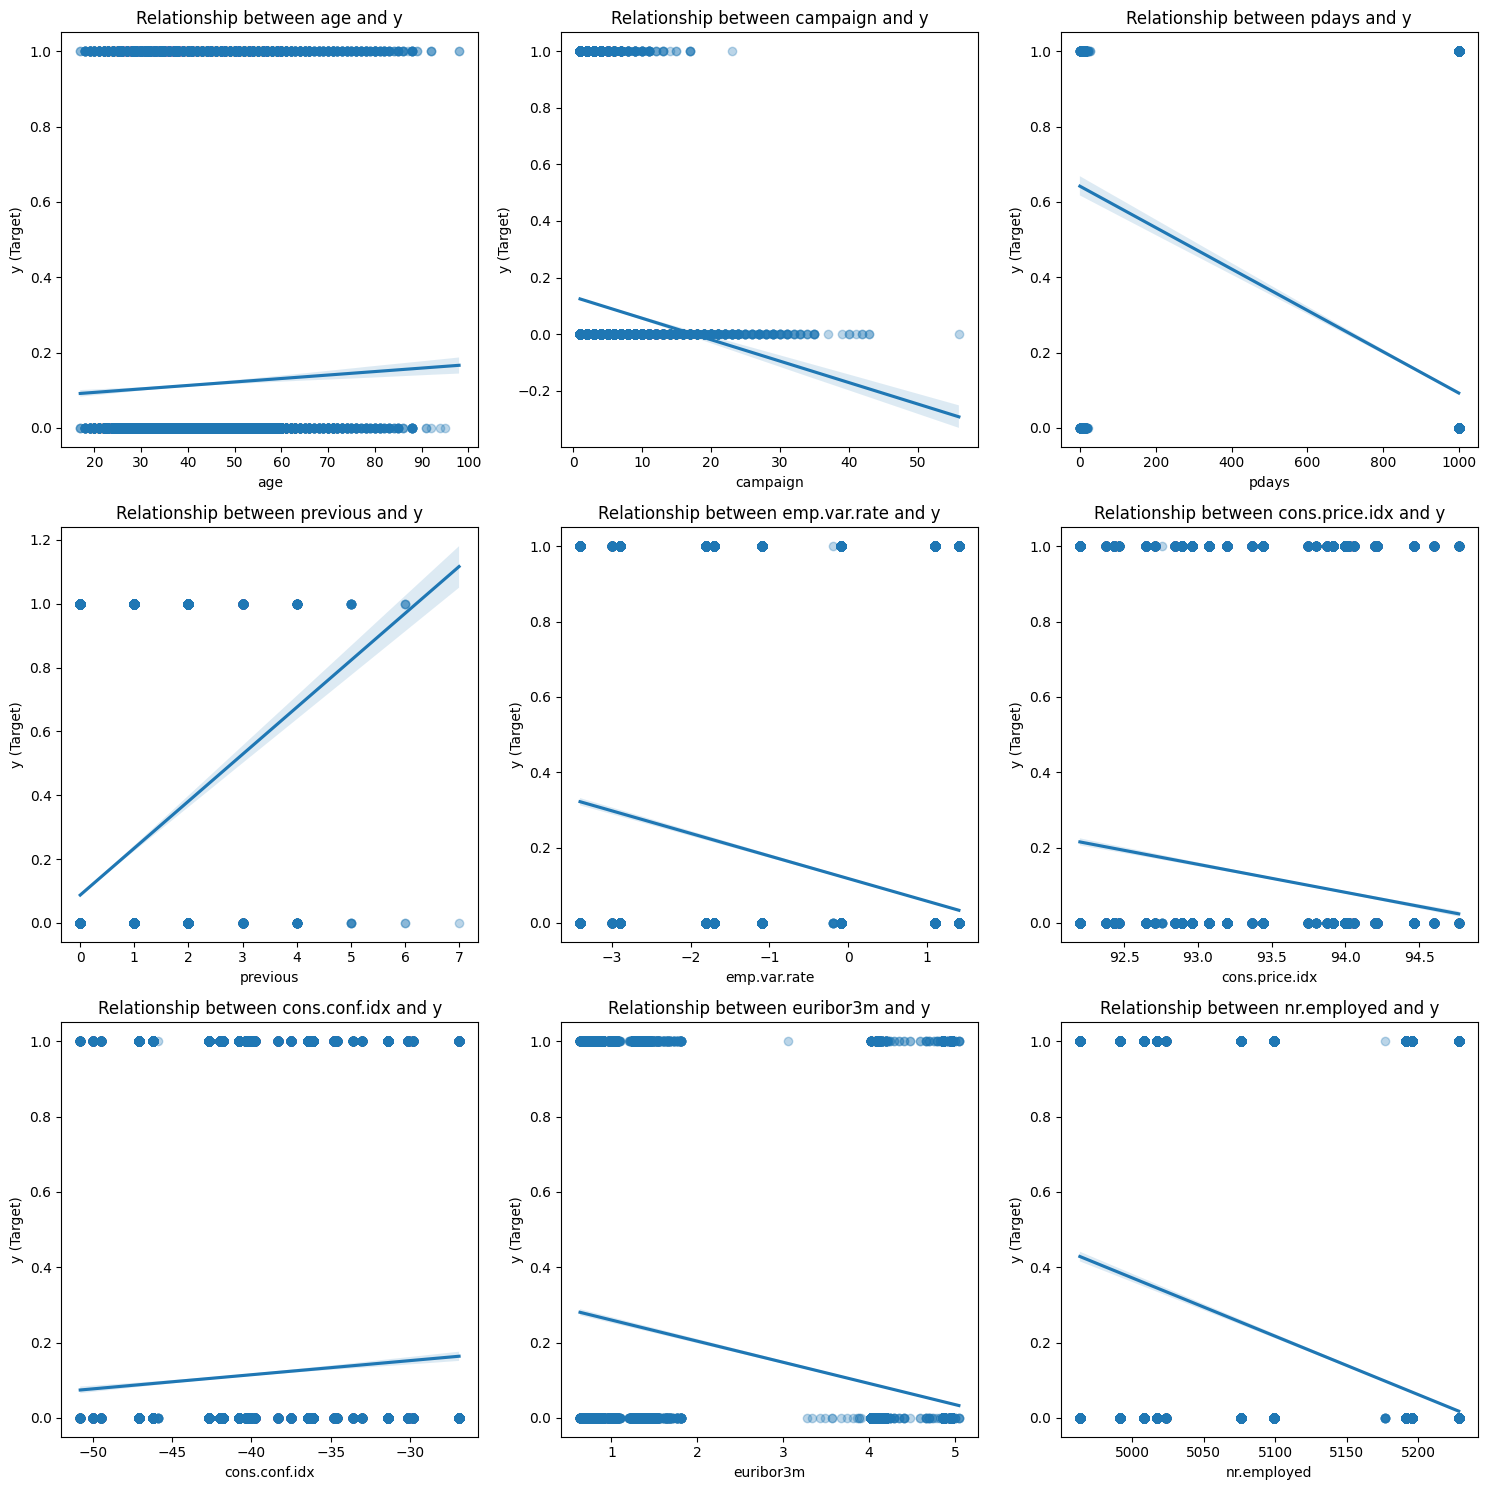

In [66]:
col = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

n_cols = 3
n_rows = -(-len(col) // n_cols)  # Ceiling division to get the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten in case of single row/column

for idx, i in enumerate(col):
    sns.regplot(x=df[i], y=df['y'], scatter_kws={'alpha':0.3}, ax=axes[idx])    #alpha=0.5, ax=axes[idx]
    axes[idx].set_xlabel(i)
    axes[idx].set_ylabel('y (Target)')
    axes[idx].set_title(f'Relationship between {i} and y')

# Remove empty subplots if the number of columns is not a multiple of 3
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

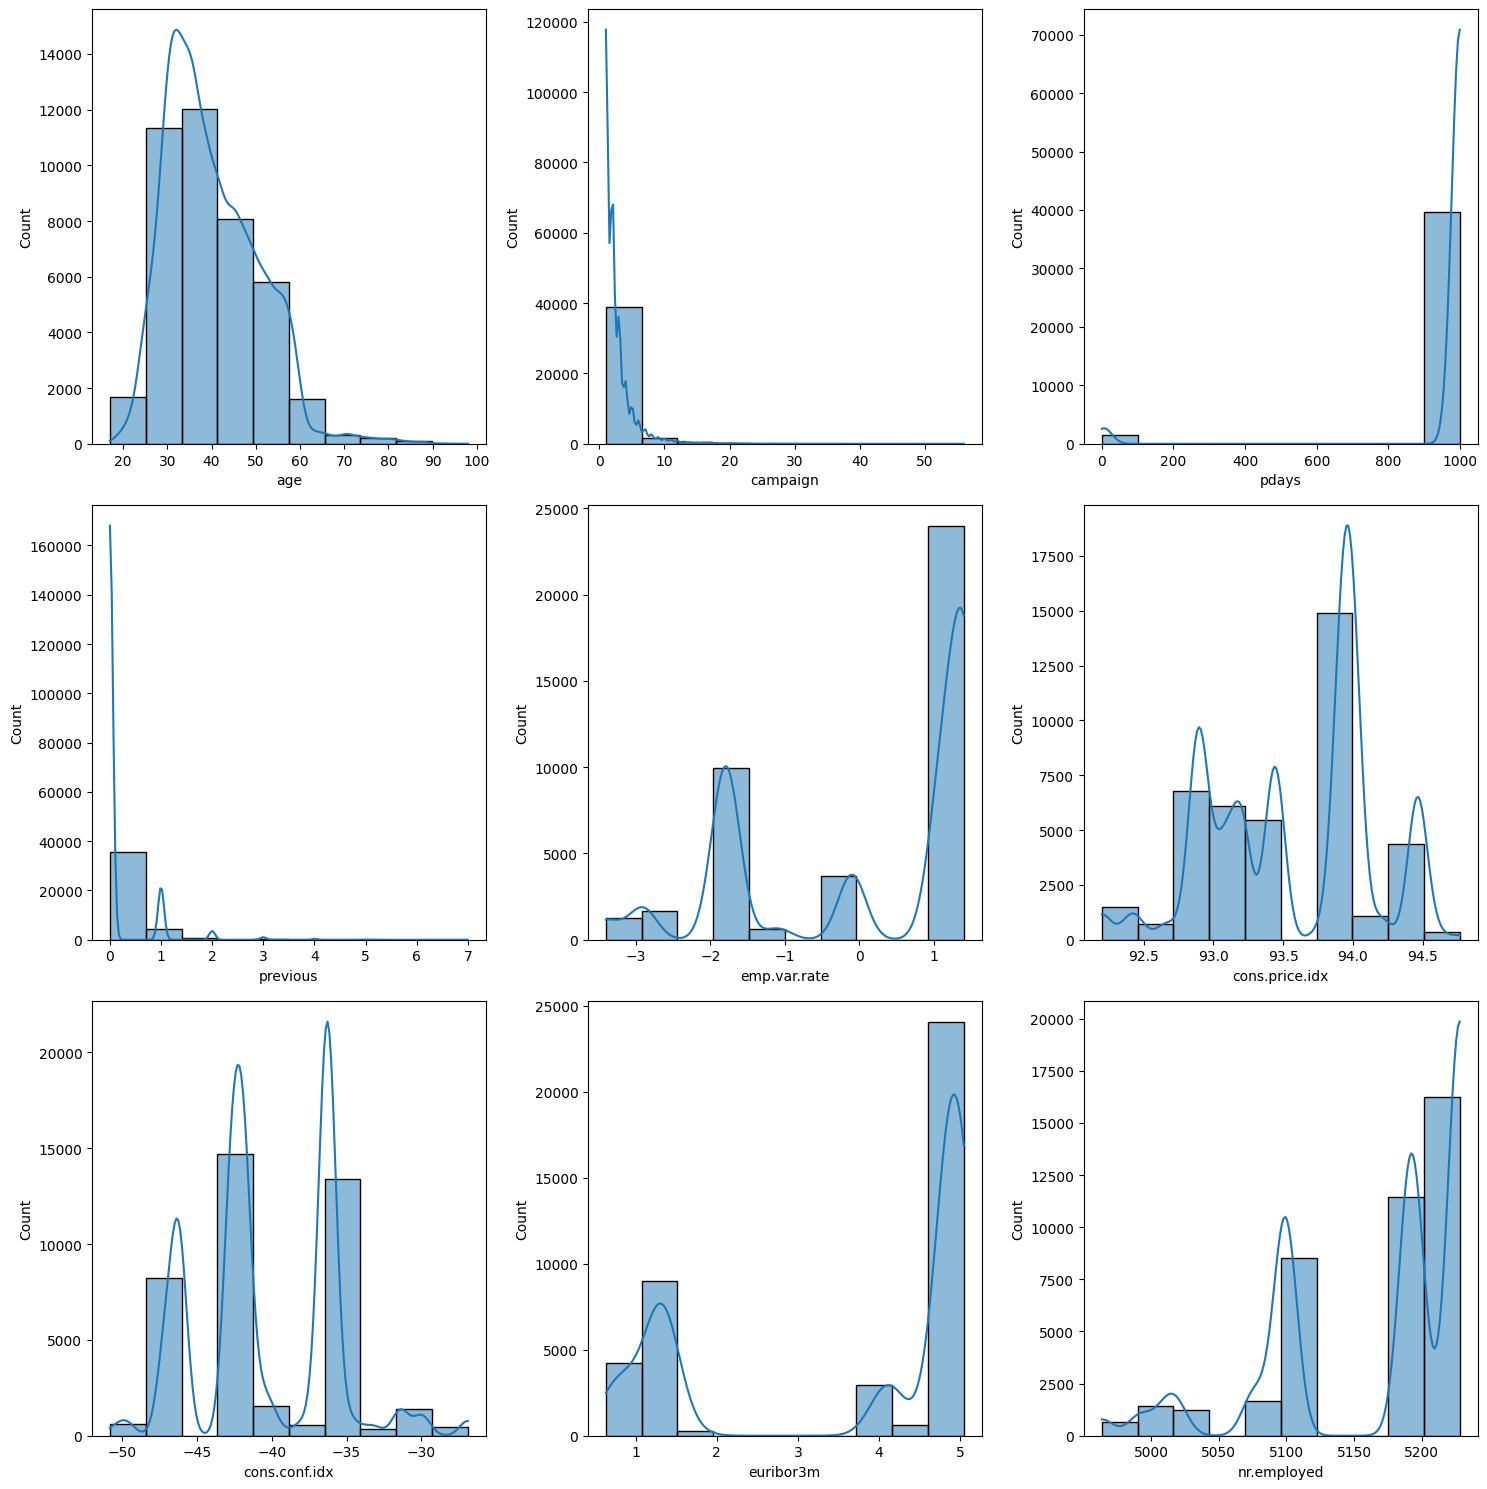

In [67]:
col = ['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

n_cols = 3
n_rows = -(-len(col) // n_cols)
fig,axes = plt.subplots(n_rows,n_cols,figsize=(15,5*n_rows))
axes = axes.flatten()

for idx, i in enumerate(col):
     sns.histplot(df[i],ax=axes[idx],bins =10,kde=True)
     axes[idx].set_xlabel(i)

for j in range(idx+1,len(axes)):
     fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


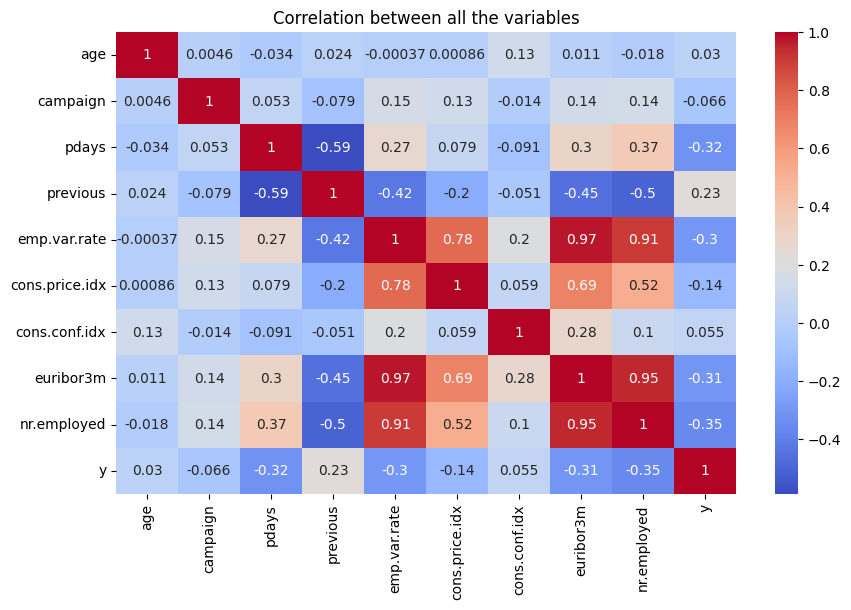

In [68]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation between all the variables')
plt.show()

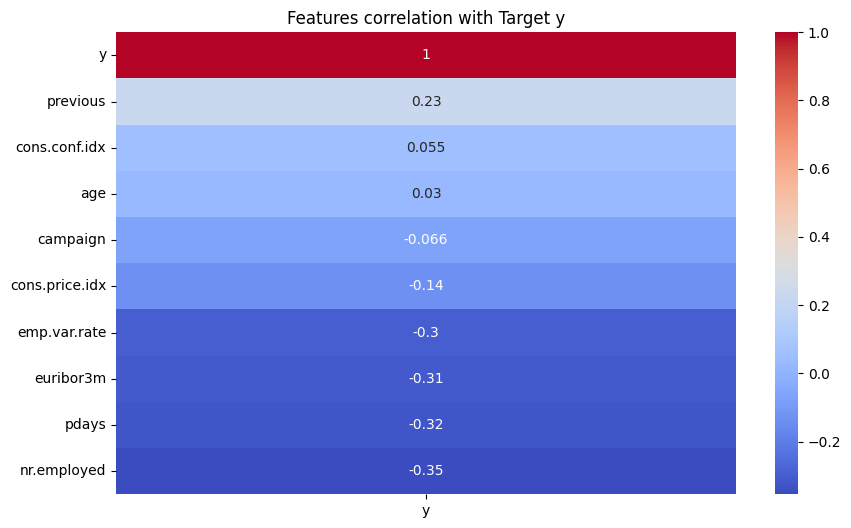

In [69]:
corr_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix[['y']].sort_values(by='y',ascending=False),annot=True,cmap='coolwarm')
plt.title('Features correlation with Target y')
plt.show()

In [70]:
df.drop('emp.var.rate',axis=1,inplace=True)
df.drop('euribor3m',axis=1,inplace=True)

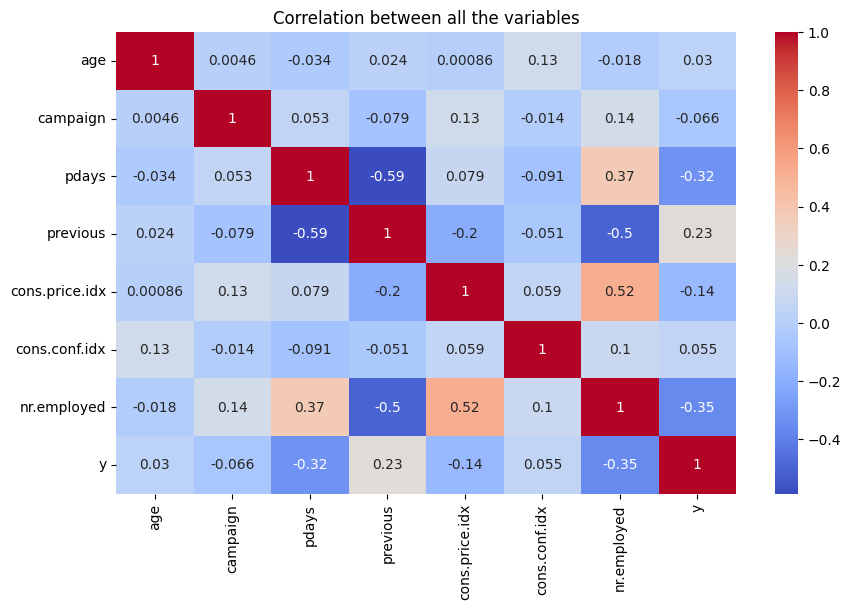

In [71]:
# check the correlation matrix again
corr_matrix2 = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix2,annot=True,cmap='coolwarm')
plt.title('Correlation between all the variables')
plt.show()
# ok looks there is not extreme correlations anymore

In [72]:
duplicates = df[df.duplicated(keep=False)]
#print(duplicates) --> yes, some duplicate ex: rows 10 and 7
duplicates.shape


(4319, 18)

In [73]:
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(38832, 18)

In [74]:
# for all the columns with yes, no, unknown we transform to 1,0,-1
def binary_clean(column):
    df[column]=df[column].replace({'yes':1,'no':0,'unknown':-1})

In [75]:
column_name = ['default','housing','loan']

for i in column_name:
    binary_clean(i)

<ipython-input-74-a60fe1f5140c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column]=df[column].replace({'yes':1,'no':0,'unknown':-1})


In [76]:
for i in df:
    print(f'{i}: {df[i].unique()}')

age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: [ 0 -1  1]
housing: [ 0  1 -1]
loan: [ 0  1 -1]
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
campaign: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
pdays: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16


In [77]:
def label_encode(df,columns,order=None):
    label_encoder = LabelEncoder()
    label_encoder.fit(order if order else df[columns].unique())
    df[columns]= label_encoder.transform(df[columns])

In [78]:
label_encode(df,'education',order=['illiterate','basic.4y','basic.6y','basic.9y','high.school','university.degree','professional.course','unknown'])
label_encode(df,'month',order=['mar','apr','may','jun','jul','aug', 'sep','oct','nov','dec'])
label_encode(df,'day_of_week',order=['mon','tue','wed','thu','fri'])

In [79]:
df['poutcome'] = df['poutcome'].replace({'success':1,'failure':0,'nonexistent':-1})

<ipython-input-79-73bfe2a69b06>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['poutcome'] = df['poutcome'].replace({'success':1,'failure':0,'nonexistent':-1})


In [80]:
def one_hot(df,colonne):

    # Apply one-hot encoding
    df = pd.get_dummies(df, columns=colonne, drop_first=True)

    return df

In [81]:
columns = ['job','marital','contact']
df = one_hot(df,columns)

In [82]:
for i in df:
    print(f'column {i}: {df[i].unique()}')

column age: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
column education: [0 3 1 2 5 7 6 4]
column default: [ 0 -1  1]
column housing: [ 0  1 -1]
column loan: [ 0  1 -1]
column month: [6 4 3 1 8 7 2 5 0 9]
column day_of_week: [1 3 4 2 0]
column campaign: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
column pdays: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
column previous: [0 1 2 3 4 5 6 7]
column poutcome: [-1  0  1]
column cons.price.idx: [93.99 94.47 93.92 93.44 93.8  93.2  92.76 92.84 93.08 92.89 92.96 92.47
 92.2  92.38 92.43 92.65 92.71 93.37 93.75 93.88 94.06 94.22 94.03 94.2
 94.6  94.77]
column cons.conf.idx: [-36.4 -41.8 -42.7 -36.1 -40.

In [83]:
df.describe()

,age,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,nr.employed,y
count,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000,38832.000000
mean,40.164916,3.739133,-0.210548,0.496807,0.133292,4.264756,1.995365,2.633833,960.285100,0.181139,-0.822080,93.574748,-40.524045,5165.494950,0.118330
std,10.491457,2.138609,0.407893,0.548106,0.407372,2.316573,1.398605,2.830577,192.213253,0.506248,0.465761,0.585113,4.652459,72.994163,0.323003
min,17.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,92.201000,-50.800000,4963.600000,0.000000
25%,32.000000,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,999.000000,0.000000,-1.000000,93.075000,-42.700000,5099.100000,0.000000
50%,38.000000,3.000000,0.000000,1.000000,0.000000,4.000000,2.000000,2.000000,999.000000,0.000000,-1.000000,93.749000,-41.800000,5191.000000,0.000000
75%,47.000000,6.000000,0.000000,1.000000,0.000000,6.000000,3.000000,3.000000,999.000000,0.000000,-1.000000,93.994000,-36.400000,5228.100000,0.000000
max,98.000000,7.000000,1.000000,1.000000,1.000000,9.000000,4.000000,56.000000,999.000000,7.000000,1.000000,94.767000,-26.900000,5228.100000,1.000000


In [84]:
df['default'].value_counts()

,count
default,
0,30650
-1,8179
1,3


In [85]:
prev_contact=df['pdays']!=999

for index,i in enumerate(prev_contact):
    if i:
        df.loc[index,'pre_cont']=1
    else:
        df.loc[index,'pre_cont']=0

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [88]:
df = shuffle(df, random_state=42).reset_index(drop=True)
X = df.iloc[:, :-1]
y = df.loc[:,'y']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

x_train.head()
y_train.head()
x_test.head()

,age,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,contact_telephone
2617,46,2,0,1,0,4,3,2,999,0,...,False,False,False,False,True,False,True,False,False,False
6608,76,0,0,0,0,1,3,1,999,1,...,False,False,False,False,False,False,False,False,False,False
21115,27,3,0,1,0,3,0,1,999,0,...,False,False,False,False,False,False,False,True,False,True
35501,57,6,-1,1,0,1,4,8,999,0,...,False,False,False,True,False,False,False,True,False,False
9087,52,5,0,1,0,7,0,1,999,1,...,False,False,False,True,False,False,True,False,False,False


In [89]:
columns_scale = ['age','campaign','pdays','cons.price.idx','cons.conf.idx','nr.employed']
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[columns_scale])
x_test_scaled = scaler.transform(x_test[columns_scale])
x_train[columns_scale] = x_train_scaled
x_test[columns_scale] = x_test_scaled

x_train.head()

,age,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,contact_telephone
13067,-0.400861,5,0,1,0,6,1,-0.573603,0.201836,0,...,False,False,False,True,False,False,False,True,False,False
37452,1.128754,6,0,-1,-1,1,2,-0.225326,0.201836,0,...,False,False,False,False,False,False,True,False,False,False
28885,0.268345,1,0,1,1,3,4,0.471229,0.201836,0,...,False,False,False,False,False,False,False,True,False,False
24650,0.841951,6,0,0,0,4,3,1.167784,0.201836,0,...,False,False,False,False,False,False,True,False,False,True
19138,1.033153,0,-1,1,1,3,1,0.122952,0.201836,0,...,False,False,False,False,False,False,True,False,False,False


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [91]:
model = LogisticRegression(penalty='l2', C=1, class_weight='balanced',random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [92]:
test_accuracy = accuracy_score(y_test,y_pred)
train_accuracy = accuracy_score(y_train,y_pred_train)
print(f'the test accuracy is {test_accuracy} \nthe train accuracy is {train_accuracy}')

the test accuracy is 1.0 
the train accuracy is 1.0


In [93]:
y_test.unique()

array([1, 0])

In [94]:
# check that the prediction and the true value are the same
check = pd.concat([pd.Series(y_pred, name="Predicted",index=y_test.index), y_test], axis=1)
print(check.head(100))
y_test_numpy = y_test.to_numpy()

any(y_pred!=y_test_numpy) #return False, so predict everything correctly

       Predicted  y
2617           1  1
6608           1  1
21115          0  0
35501          0  0
9087           0  0
...          ... ..
6853           0  0
926            0  0
6275           0  0
36940          0  0
19065          0  0

[100 rows x 2 columns]


False

In [95]:
from sklearn.model_selection import cross_val_score

# Using cross-validation to evaluate model performance
model_cross = LogisticRegression(penalty='l2', C=1, class_weight='balanced',random_state=42)
cross_val_scores = cross_val_score(model_cross, x_train, y_train, cv=6)

print("Cross-validation scores:", cross_val_scores)
print("Mean cross-validation score:", cross_val_scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


In [96]:
cnf_matrix = confusion_matrix(y_test,y_pred,labels=[1,0])
np.set_printoptions(precision=2)
print(cnf_matrix)

[[ 1407     0]
 [    0 10243]]


In [97]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

              precision  recall  f1-score  support
0                   1.0     1.0       1.0  10243.0
1                   1.0     1.0       1.0   1407.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0  11650.0
weighted avg        1.0     1.0       1.0  11650.0


In [98]:
# If you don't have eli5, you
!pip install eli5==0.13.0 # This version is an example; you might have to find a suitable compatible version

In [99]:
feature_names = x_train.columns

In [100]:
coefficients = model.coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)  # Sort by impact
print(coef_df)

              Feature  Coefficient
14                  y    13.597192
10           poutcome     0.716127
3             housing     0.100528
12      cons.conf.idx     0.053680
4                loan     0.004524
25        job_unknown    -0.001763
29  contact_telephone    -0.015177
1           education    -0.020523
28    marital_unknown    -0.031318
6         day_of_week    -0.032580
7            campaign    -0.040019
0                 age    -0.046051
15    job_blue-collar    -0.054569
11     cons.price.idx    -0.062817
22        job_student    -0.069217
5               month    -0.080493
8               pdays    -0.116084
20  job_self-employed    -0.116907
18     job_management    -0.127400
2             default    -0.131864
16   job_entrepreneur    -0.139685
23     job_technician    -0.166509
19        job_retired    -0.167493
24     job_unemployed    -0.173506
17      job_housemaid    -0.277275
26    marital_married    -0.312135
21       job_services    -0.339910
27     marital_singl

In [101]:
!pip install -U scikit-learn

In [102]:
#explanation = eli5.explain_weights(model, feature_names=x_train.columns.tolist())
import eli5
eli5.show_weights(model, feature_names=x_train.columns.tolist())

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (/usr/local/lib/python3.11/dist-packages/sklearn/utils/metaestimators.py)